In [146]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [147]:
data = pd.read_csv('titanic_dataset1 .csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [149]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [150]:
#sns.pairplot(data)

In [151]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [152]:
#data['Fare'].value_counts()
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: ylabel='Frequency'>

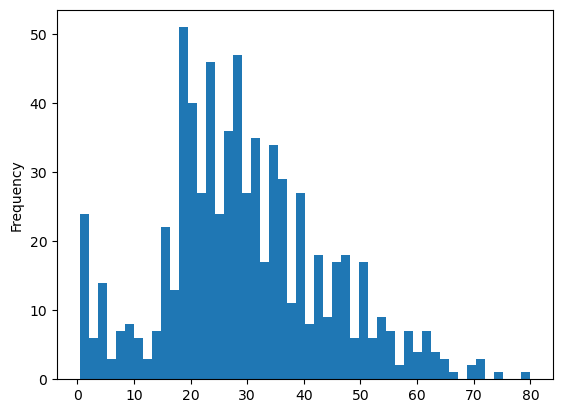

In [153]:
data['Age'].plot(kind='hist',bins=50)

Data cleaning and Pre-Processing

In [154]:
data['Age'] = data['Age'].fillna(data['Age'].dropna().mean())

In [155]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [156]:
for col in ['Cabin','Embarked']:
    data[col] = data[col].fillna(data[col].ffill())

In [157]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       1
Embarked    0
dtype: int64

In [158]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].bfill())

In [159]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [160]:
data['Embarked'].value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

In [161]:
#Change categorical col to numeric
data.loc[data['Sex']=='male','Sex']=0
data.loc[data['Sex']=='female','Sex']=1

In [162]:
data.loc[data['Embarked'] == 'S','Embarked']=0
data.loc[data['Embarked'] == 'C','Embarked']=1
data.loc[data['Embarked'] == 'Q','Embarked']=2

In [163]:
data['Embarked'].value_counts()

0    644
1    169
2     78
Name: Embarked, dtype: int64

In [164]:
#Drop unnecessary columns
data = data.drop(['Name','Cabin','Ticket'],axis=1)

In [165]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,0
5,0,3,0,35.0,0,0,8.0500,0


In [166]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [167]:
num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch','Fare']

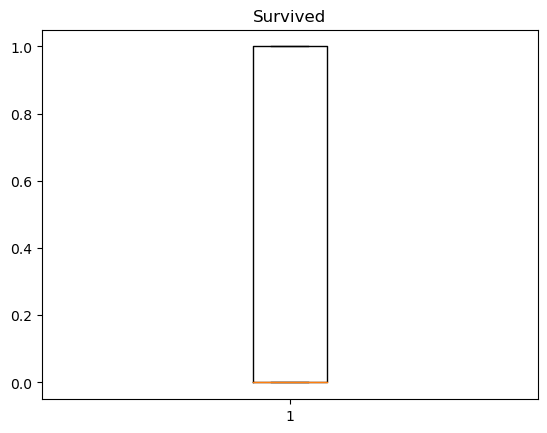

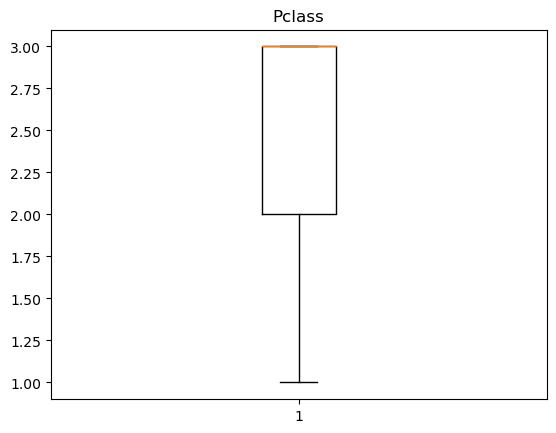

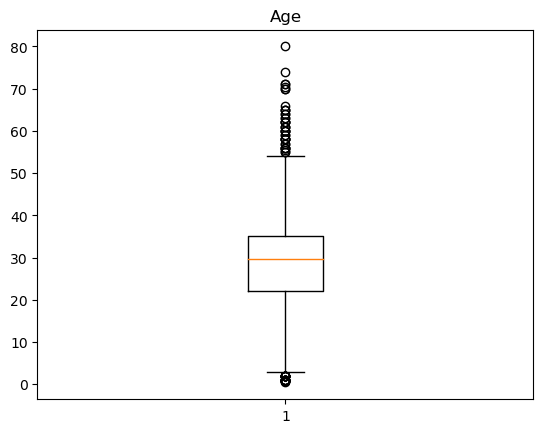

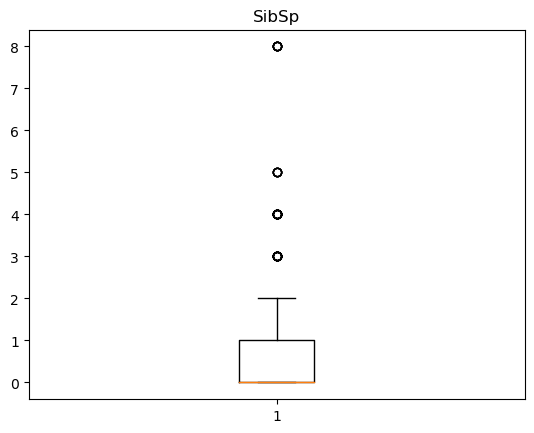

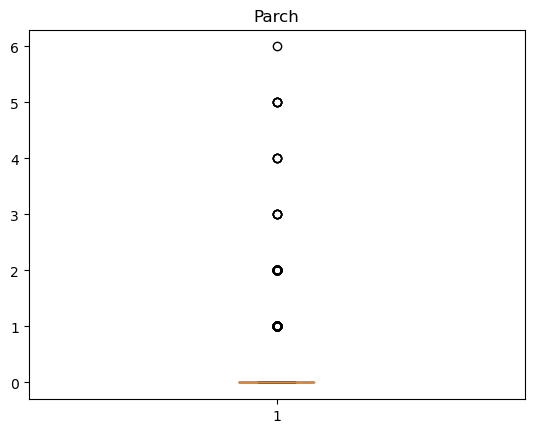

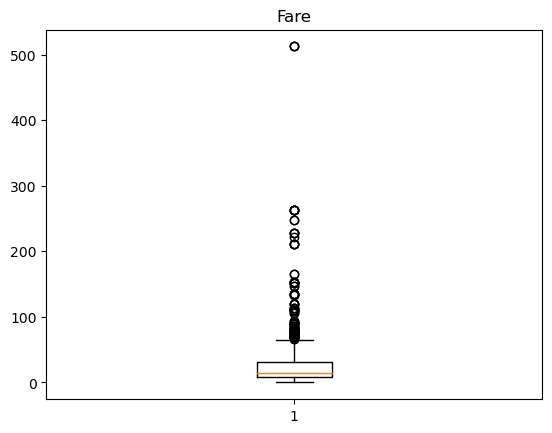

In [168]:
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [169]:
data.shape

(891, 8)

Outlier Detection and Handling

In [170]:
Q1 = np.percentile(data['SibSp'],25,method='midpoint')
Q2 = np.percentile(data['SibSp'],50,method ='midpoint')
Q3 = np.percentile(data['SibSp'],75,method = 'midpoint')

In [171]:
print('Q1 ', Q1)
print('Q2 ', Q2)
print('Q3 ', Q3)

Q1  0.0
Q2  0.0
Q3  1.0


In [172]:
IQR = Q3 - Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

In [173]:
print('min is ',low_lim)
print('max is ',up_lim)

min is  -1.5
max is  2.5


In [174]:
outlier = []
for x in data['SibSp']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [175]:
len(outlier)

46

In [176]:
ind1 = data['SibSp']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64', name='PassengerId')

In [177]:
ind2 = data['SibSp']>up_lim
indes = data.loc[ind2].index
indes

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [178]:
data.drop(indes,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,0
5,0,3,0,35.0,0,0,8.0500,0


In [179]:
data.shape

(845, 8)

In [180]:
Q1 = np.percentile(data['Age'],25,method='midpoint')
Q2 = np.percentile(data['Age'],50,method='midpoint')
Q3 = np.percentile(data['Age'],75,method ='midpoint')

In [181]:
print('Q1 ',Q1)
print('Q2 ',Q2)
print('Q3 ',Q3)

Q1  23.0
Q2  29.69911764705882
Q3  36.0


In [182]:
IQR = Q3 - Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

In [183]:
print('min is ',low_lim)
print('max is ',up_lim)

min is  3.5
max is  55.5


In [184]:
outlier=[]
for x in data['Age']:
    if x<low_lim:
        outlier.append(x)

In [185]:
ind_age = data['Age']<low_lim
inds_age = data.loc[ind_age].index
inds_age

Int64Index([ 44,  79, 173, 184, 194, 206, 298, 306, 341, 349, 382, 408, 470,
            480, 531, 645, 756, 789, 804, 828, 832],
           dtype='int64', name='PassengerId')

In [186]:
data.drop(inds_age,inplace = True)
data.head()
#data.shape

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,0
5,0,3,0,35.0,0,0,8.0500,0


In [187]:
data.shape

(824, 8)

In [188]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Training and Testing

In [189]:
X = data.drop('Survived',axis=1)
y = data['Survived']


In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.25, random_state=42)

In [192]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

KNN

In [193]:
from sklearn.neighbors import KNeighborsClassifier

In [194]:
metric_k = []
neighbors = np.arange(3,15)

In [195]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [196]:
metric_k

[0.7330097087378641,
 0.7233009708737864,
 0.6747572815533981,
 0.6844660194174758,
 0.6990291262135923,
 0.7038834951456311,
 0.7135922330097088,
 0.7038834951456311,
 0.7475728155339806,
 0.7330097087378641,
 0.7378640776699029,
 0.7330097087378641]

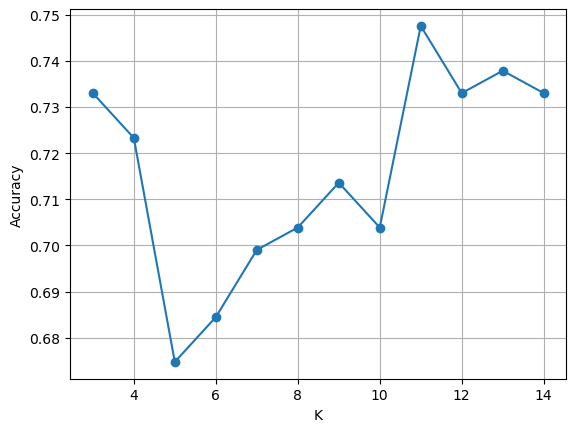

In [197]:
plt.plot(neighbors,metric_k,marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

In [198]:
classifier = KNeighborsClassifier(n_neighbors=11,metric='euclidean')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accur = accuracy_score(y_pred,y_test)
print(accur)

0.7475728155339806


SVM

In [200]:
from sklearn.svm import SVC

In [201]:
svm_cls  = SVC(kernel='linear')

In [202]:
svm_cls = svm_cls.fit(X_train,y_train)

In [203]:
y_pred_svm = svm_cls.predict(X_test)

In [204]:
svm_acc = accuracy_score(y_test,y_pred_svm)
print(svm_acc)

0.8058252427184466


In [205]:
svm_cls1 = SVC(kernel='rbf')
svm_cls1 = svm_cls1.fit(X_train,y_train)
y_pred_svm1 = svm_cls1.predict(X_test)

In [206]:
svm_acc1 = accuracy_score(y_test,y_pred_svm1)
print(svm_acc1)

0.7233009708737864


K Fold Cross Validation

In [207]:
from sklearn.model_selection import KFold

In [209]:
k = KFold(20)
k

KFold(n_splits=20, random_state=None, shuffle=False)

In [210]:
for train_index,test_index in k.split(X,y):
    print('Training index',train_index)
    print('Test index',test_index)

Training index [ 42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284

In [211]:
from sklearn.model_selection import cross_val_score

In [212]:
cv_result = cross_val_score(classifier,X,y,cv=k)
cv_result

array([0.61904762, 0.73809524, 0.61904762, 0.71428571, 0.75609756,
       0.68292683, 0.73170732, 0.68292683, 0.7804878 , 0.53658537,
       0.85365854, 0.63414634, 0.6097561 , 0.82926829, 0.73170732,
       0.75609756, 0.82926829, 0.68292683, 0.7804878 , 0.75609756])

In [213]:
np.mean(cv_result)

0.7162311265969803

In [214]:
cv_result_svm = cross_val_score(svm_cls,X,y,cv=k)
cv_result_svm

array([0.78571429, 0.88095238, 0.78571429, 0.83333333, 0.80487805,
       0.7804878 , 0.82926829, 0.92682927, 0.82926829, 0.70731707,
       0.85365854, 0.7804878 , 0.73170732, 0.7804878 , 0.75609756,
       0.70731707, 0.82926829, 0.90243902, 0.80487805, 0.80487805])

In [215]:
np.mean(cv_result_svm)

0.8057491289198607

Stratified K-Fold Cross Validation

In [216]:
from sklearn.model_selection import StratifiedKFold

In [217]:
sk = StratifiedKFold(n_splits=20)

In [218]:
for train_index,test_index in sk.split(X,y):
    print("Training index",train_index)
    print("Test index",test_index)

Training index [ 28  32  35  39  42  46  47  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284

In [219]:
skvc_result = cross_val_score(classifier,X,y,cv=sk)
skvc_result

array([0.64285714, 0.71428571, 0.57142857, 0.61904762, 0.75609756,
       0.70731707, 0.80487805, 0.65853659, 0.80487805, 0.6097561 ,
       0.70731707, 0.65853659, 0.68292683, 0.82926829, 0.68292683,
       0.7804878 , 0.75609756, 0.65853659, 0.7804878 , 0.75609756])

In [220]:
np.mean(skvc_result)

0.7090882694541232

In [222]:
skvc_result_svm = cross_val_score(svm_cls,X,y,cv = sk)
skvc_result_svm

array([0.78571429, 0.85714286, 0.78571429, 0.83333333, 0.82926829,
       0.73170732, 0.87804878, 0.92682927, 0.80487805, 0.85365854,
       0.70731707, 0.82926829, 0.73170732, 0.80487805, 0.75609756,
       0.75609756, 0.7804878 , 0.85365854, 0.80487805, 0.80487805])

In [223]:
np.mean(skvc_result_svm)

0.8057781649245065